##**발표 주제 : 딥러닝을 활용한 캡슐내시경 판별모델 개발**

<img src="https://ifh.cc/g/Vkd7Rw.png" width = 600/>

---

#**1. 관심 데이터 설정**

Dataset : 내시경 사진 데이터 (https://datasets.simula.no/kvasir/)


###**캡슐 내시경의 특징**
- 일상 생활을 하면서 간편하게 진행할 수 있다.
- 소장 등 기존 내시경이 촬영하기 힘든 부분도 검사가 가능하다.
- 약 10시간, **5만장 내외의 사진**을 촬영하게 되고, 이를 소화기내과 의사가 판독해야 한다.
- 여러가지 한계와 100만원 정도의 비용으로 아직까지 널리 보급되지 못하고 있다.

---

#**2. 데이터 선정 이유**

###**1. 해당 프로젝트 관련 분야**
- 의료인공지능 기업 : 주목받는 인공지능 스타트업 중 의료분야 기업이 많은 수를 차지하고 있다. (JLK, VUNO, Lunit 등) 
- 의료기기 제조업체 : 기존의 의료기기 업체에서도 인공지능의 도입을 추진하고 있다.
- 대형 병원 : 대형 병원에서도 환자 데이터를 활용해 인공지능 기업 또는 연구실과 손을 잡고 있다.

###**2. 캡슐 내시경에 딥러닝을 도입해야 하는 이유**
- 빠른 사진 분류로 의료진의 업무 효율을 높일 수 있다.
- 소화기내과 의사 주 71.5시간 업무.. 89.6%가 근골격계 통증, 68.9%가 우울과 불안 증상 경험
- 내시경 해상도 및 숙련도에 따라 용종의 미탐지율이 20%정도 나올 수 있다.
- 실시간으로 사진 정보를 분석할 수 있다.
- 캡슐 내시경 검사시 매번 5만여장의 데이터셋이 수집된다.

---

#**3. 데이터를 이용한 가설** : 모델이 가져올 변화


###**1. 딥러닝이 내시경 사진 분류를 할수 있을 것이다** : 능동적 캡슐 내시경

캡슐 내시경은 장운동에 의해 수동적으로 움직이지만, 판별 모델이 탑재가 된다면 마치 의사처럼 이상 발견시 촬영을 자세히 하거나 약품 투입 등의 능동적인 행동이 가능해질 것이다.

전문의의 진단에 앞서 선제적 검사로서 활용이 가능하며, 의료인의 노동력 감소로 비용이 절감되면 시장이 확대되고 의료시설이 부족한 국가에서 활용 될 수 있을 것이다.

###**2. 딥러닝 모델이 Polyp Detection을 할 수 있을 것이다.**

Polyp Detection 모델을 통해

---

#**4. 데이터 전처리**

###**1. 좌측 하단 녹색 창**

이미지 좌측 하단 패턴 일정하게 만들까 생각을 했지만, 앞으로 테스트에 나쁜 영향을 줄 것 같아 그대로 두었다.

###**2. Image Augmentation**

내시경 특성상 이미지를 회전시켜 학습할 경우 효과가 좋다고 판단되었으나, 제한된 시간으로 차후에 진행하기로 결정하였다. 

###**3. Labeling**

Polyp에 대한 Object Detection을 위해 LabelIMG를 활용하여 레이블링 하였다.

---

#**5. 딥러닝 적용**

##**1. Simple Image Classification**

6개 클래스의 이미지를 분류하는 모델입니다.

<img src="https://ifh.cc/g/HrOPpt.jpg" width = 700/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import PIL.Image as Image

IMAGE_SHAPE = (224, 224)
polyps_image = Image.open('/content/drive/MyDrive/1.codestates/3.project/endoscopy-dataset/polyps/0014d89e-5afa-4186-99f9-4400c8c58a18.jpg').resize(IMAGE_SHAPE)
# polyps_image

In [ ]:
# Image Generator
generator = ImageDataGenerator(validation_split=0.2, rescale=1./255)

In [ ]:
data_dir = '/content/drive/MyDrive/1.codestates/3.project/endoscopy-dataset'
batch_size = 32

In [ ]:
train_gen = generator.flow_from_directory(
  directory=data_dir,
  batch_size=batch_size,
  target_size=(128,128),
  shuffle=True,
  class_mode='categorical',
  subset = 'training')

Found 2400 images belonging to 6 classes.


In [ ]:
val_gen = generator.flow_from_directory(
  directory=data_dir,
  batch_size=batch_size,
  target_size=(128,128),
  shuffle=False,
  class_mode='categorical',
  subset = 'validation')

Found 600 images belonging to 6 classes.


In [ ]:
# 6개 클래스, 은닉층은 relu, 출력층은 softmax

model = Sequential()

model.add(Conv2D(32, input_shape=(128,128,3), kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 115200)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                7372864   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
model.fit(train_gen, epochs=10, validation_data=val_gen)

Epoch 1/10
75/75 [==============================] - 852s 11s/step - loss: 1.0176 - accuracy: 0.5838 - val_loss: 0.8148 - val_accuracy: 0.6417
Epoch 2/10
75/75 [==============================] - 132s 2s/step - loss: 0.5904 - accuracy: 0.7529 - val_loss: 0.6577 - val_accuracy: 0.7417
Epoch 3/10
75/75 [==============================] - 132s 2s/step - loss: 0.4555 - accuracy: 0.8183 - val_loss: 0.6121 - val_accuracy: 0.7600
Epoch 4/10
75/75 [==============================] - 135s 2s/step - loss: 0.3845 - accuracy: 0.8425 - val_loss: 0.7378 - val_accuracy: 0.7133
Epoch 5/10
75/75 [==============================] - 132s 2s/step - loss: 0.3413 - accuracy: 0.8671 - val_loss: 0.7308 - val_accuracy: 0.7417
Epoch 6/10
75/75 [==============================] - 132s 2s/step - loss: 0.2532 - accuracy: 0.9062 - val_loss: 0.9286 - val_accuracy: 0.7117
Epoch 7/10
75/75 [==============================] - 132s 2s/step - loss: 0.1973 - accuracy: 0.9262 - val_loss: 1.0586 - val_accuracy: 0.6833
Epoch 8/10
7

- 10 Epoch 결과 val_accuracy 0.7733으로 나왔으며 3 Epoch 이후부터 과적합이 되는 경향이 있다.

---

##**2. Object Detection** : Pre-trained model 활용

Polyp의 경우 경계가 불분명하게 분리된 클래스이기 때문에 Segmentation이 아닌 Object Detection으로 접근하였다.

pre-tained model을 활용한 polyps 인식

<img src="https://ifh.cc/g/WZqgSj.jpg" width = 500/>

In [ ]:
import random
import matplotlib.pyplot as plt
import skimage.io
import numpy as np
import os

from keras import *
from keras.models import *
from keras.layers import Input, Dense
from keras.preprocessing import image

from matplotlib.patches import Rectangle
import keras

In [ ]:
WINDOW_SIZES = [120]      # using only one size for the sliding window
window_sizes=WINDOW_SIZES 
step=10                   # step of sliding on the input image (how to divide the original image)

Input image size= 576 720


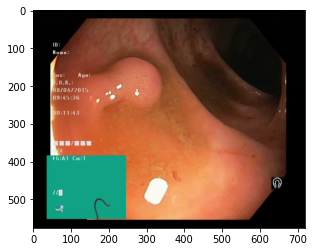

In [ ]:
img = skimage.io.imread('/content/drive/MyDrive/1.codestates/3.project/endoscopy-dataset/polyps/0b4f0370-b25b-4e6a-a7ac-b09097bfecc3.jpg')
print('Input image size=',img.shape[0],img.shape[1])
plt.figure()
plt.imshow(img)

In [ ]:
from keras.models import load_model

#model = load_model('/content/drive/MyDrive/1.codestates/3.project/saved_models/model_best_Conv-Conv-Conv-FC_weigths.h5')
#print(model.summary())

In [ ]:
# pre-trained 모델에 문제가 있어 불러오지 못하는 문제가 있다.

---

##**3. Object Detection** : LabelIMG 를 이용하여 레이블링하기

labelImg 프로그램을 활용하여 폴립에 대하여 Bounding-box 라벨링

cmd창에서 *pip install labelImg* (설치) → *labelImg* (실행)

<img src="https://ifh.cc/g/8fgQtb.gif" width = 700/>

500장의 Polyp 이미지에 bounding box 처리를 해주었다.

PascalVDC로 설정하면 csv 파일이 생성되고, YOLO로 설정할 경우 txt파일이 생성된다.

생성된 텍스트 파일은 다음과 같이 Object의 좌표값을 가지고 있다.

<img src="https://ifh.cc/g/n5nNTa.png" width = 400/>

---

##**4. Object Detection** : YOLOv5 적용

참고 : https://www.youtube.com/watch?v=T0DO1C8uYP8&ab_channel=%EB%B9%B5%ED%98%95%EC%9D%98%EA%B0%9C%EB%B0%9C%EB%8F%84%EC%83%81%EA%B5%AD

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git                                                                                                          

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 9185, done.
remote: Total 9185 (delta 0), reused 0 (delta 0), pack-reused 9185
Receiving objects: 100% (9185/9185), 9.64 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (6373/6373), done.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt                                                                                                                                      

In [ ]:
%cat /content/drive/MyDrive/1.codestates/3.project/data.yaml                                                                                                

names:
- Polyp
nc: 1
train: /content/drive/MyDrive/1.codestates/3.project/train.txt
val: /content/drive/MyDrive/1.codestates/3.project/val.txt


In [ ]:
%cd /
from glob import glob

img_list = glob('/content/drive/MyDrive/1.codestates/3.project/export/images/*.jpg')

print(len(img_list))

/
500


In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2000)

print(len(train_img_list), len(val_img_list))

400 100


In [ ]:
with open('/content/drive/MyDrive/1.codestates/3.project/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/drive/MyDrive/1.codestates/3.project/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list) + '\n')

In [ ]:
import yaml

with open('/content/drive/MyDrive/1.codestates/3.project/data.yaml', 'r') as f:
  data = yaml.load(f)

print(data)

data['train'] = '/content/drive/MyDrive/1.codestates/3.project/train.txt'
data['val'] = '/content/drive/MyDrive/1.codestates/3.project/val.txt'

with open('/content/drive/MyDrive/1.codestates/3.project/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'names': ['Polyp'], 'nc': 1, 'train': '/content/drive/MyDrive/1.codestates/3.project/train.txt', 'val': '/content/drive/MyDrive/1.codestates/3.project/val.txt'}
{'names': ['Polyp'], 'nc': 1, 'train': '/content/drive/MyDrive/1.codestates/3.project/train.txt', 'val': '/content/drive/MyDrive/1.codestates/3.project/val.txt'}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [ ]:
%cd /content/yolov5/

!python train.py --img 256 --batch 32 --epochs 30 --data /content/drive/MyDrive/1.codestates/3.project/data.yaml
--cfg ./models/yolov5s.yaml --weights yolov5s.pt --name polyp_yolov5s_results                                                       

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

In [ ]:
# 테스트 이미지 Object Detection 확인

from IPython.display import Image
import os

val_img_path = val_img_list[7]
!python detect.py --weights /content/yolov5/runs/train/polyp_yolov5s_results/weights/best.pt --img 256 --conf 0.4 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)), width = 300, height = 240)

In [ ]:
# 새로운 이미지 테스트

val_img_path = '/content/drive/MyDrive/1.codestates/3.project/6polyps.jpg'
!python detect.py --weights /content/yolov5/runs/train/polyp_yolov5s_results/weights/best.pt --img 256 --conf 0.4 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp2', os.path.basename(val_img_path)), width = 460, height = 340)

In [ ]:
# Grey Image Detection 테스트

val_img_path = '/content/drive/MyDrive/1.codestates/3.project/greyimage.jpg'
!python detect.py --weights /content/yolov5/runs/train/polyp_yolov5s_results/weights/best.pt --img 256 --conf 0.4 --source "{val_img_path}"

Image(os.path.join('/content/yolov5/runs/detect/exp3', os.path.basename(val_img_path)), width = 460, height = 340)

흑백 사진으로 변경하여 테스트 한 결과 Detection 성능이 다소 하락한 것을 확인할 수 있다.

In [ ]:
# 동영상에서 Object Detection 하기

!python detect.py --source /content/drive/MyDrive/1.codestates/3.project/polyp-MP4.mp4 --weights /content/yolov5/runs/train/polyp_yolov5s_results/weights/best.pt

<img src="https://ifh.cc/g/SpdDwg.gif" width = 400/>

---

참고 자료

https://www.balasingham.net/Content/files/pdf/publication-6Xt3pSxk15SMhAMsNHAbMdZcMgYpu7DnwjOT0ryi.pdf

https://github.com/ultralytics/yolov5

https://bit.ly/3t79Bs1
